### hw_7
### Линейная регрессия. Двухвыборочный t-тест. A/B-тестирование

__Задача 1__


Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.
<hr>

**РЕШЕНИЕ:**

In [314]:
import numpy as np
import pandas as pd


In [315]:
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

Найдем коэффициенты b __аналитически__: $b = \left( X^\top X \right)^{-1} X^\top Y$

In [316]:
# Для первой пары x1 и x0
df_x01 = df_x[[0,1]]
x1 = df_x01.copy()

In [317]:
# Добавим Х0 = 1 для получения возможности применять матрицы
ones = np.ones((x1.shape[0], 1))
x1 = np.hstack((ones, x1))

In [323]:
xtx = x1.T.dot(x1)
xtx_inv = np.linalg.inv(xtx)
b = xtx_inv.dot(x1.T).dot(df_y)
print(b)


[[6.70781579]
 [0.40786841]
 [1.03360247]]


Итак, наша модель регрессии приняла вид:
$$y = 6.7078 - 0.4078 \cdot x_1 + 1.0336 \cdot x_2,$$
где $x_1$ — НУЛЕВОЙ столбей матрицы Х, $x_2$ — ПЕРВЫЙ столбей матрицы Х.

И проверим, чтобы средняя ошибка модели была равна $0$: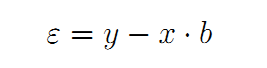

In [324]:
e = x1.dot(b) - df_y
print(f'Ошибка при таких параметрах равна {e.mean()[0]}')
# e.mean()

Ошибка при таких параметрах равна -3.552713678800501e-16


__Коэффициент детерминации:__ $$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$$

In [325]:
def sum_of_squares(samples):
    """Сумма квадратов отклонений."""
    return ((samples - samples.mean()) ** 2).sum()

In [326]:
r2 = 1 - (sum_of_squares(e))/(sum_of_squares(df_y))
print(f'Коэффициент детерминации R2 равен {r2[0]}')

Коэффициент детерминации R2 равен 0.18113594742585204


In [327]:
# Проверим штатными средствами pandas:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [328]:
lr = LinearRegression(fit_intercept=False).fit(x1, df_y)
print(f'Коэффициенты b, посчитанные вручную: \tb0 = {b[0,0]}, b1 = {b[1,0]}, b2 = {b[2,0]}' )
print(f'Коэффициенты b, посчитанные pandas: \tb0 = {lr.coef_[0,0]}, b1 = {lr.coef_[0,1]}, b2 = {lr.coef_[0,2]}' )

Коэффициенты b, посчитанные вручную: 	b0 = 6.707815790497738, b1 = 0.40786841030580134, b2 = 1.0336024709417713
Коэффициенты b, посчитанные pandas: 	b0 = 6.707815790497743, b1 = 0.4078684103057945, b2 = 1.0336024709417708


In [330]:
print(f'Коэффициент детерминации R2, посчитанный вручную: {r2[0]}')
print(f'Коэффициент детерминации R2, посчитанный pandas: {r2_score(df_y, x1@(lr.coef_[0]))}')

Коэффициент детерминации R2, посчитанный вручную: 0.18113594742585204
Коэффициент детерминации R2, посчитанный pandas: 0.18113594742585204


__Таким образом далее просто будем использовать штатные функции pandas для расчета параметров.__


In [332]:
import itertools
from itertools import combinations
list(combinations(df_x.columns, 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [333]:
for item in list(combinations(df_x.columns, 2)):
    x_ = (df_x[[item[0],item[1]]])
    x_ = np.hstack((np.ones((x_.shape[0], 1)), x_))
    lr = LinearRegression(fit_intercept=False).fit(x_, df_y)
    print(f'Коэффициент детерминации R2, для признаков {item[0]} и {item[1]}: {r2_score(df_y, x_.dot(lr.coef_[0]))}')


Коэффициент детерминации R2, для признаков 0 и 1: 0.18113594742585204
Коэффициент детерминации R2, для признаков 0 и 2: 0.763424623879315
Коэффициент детерминации R2, для признаков 0 и 3: 0.4532966783144079
Коэффициент детерминации R2, для признаков 1 и 2: 0.547948273403901
Коэффициент детерминации R2, для признаков 1 и 3: 0.6062055761129932
Коэффициент детерминации R2, для признаков 2 и 3: 0.6224419876505323


__Таким образом, максимальный коэффициент детерминации получается при использовании признаков 0 и 2__


<hr>

__Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.
<hr>

__РЕШЕНИЕ:__

Проверим через __F-тест Фишера__. Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации равен $0$. Другими словами, если нулевая гипотеза верна, то между факторами и целевой переменной вообще нет никакой значимой зависимости, а отличие коэффициента детерминации от нуля обусловлено лишь случайностью процесса.

При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Распределение Фишера имеет один хвост, поэтому рассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{1 - \alpha, \: k_1, k_2}$ — квантиль порядка $1 - \alpha$ для распределения Фишера с параметрами $k_1$, $k_2$.

Если статистика попадает в критическую область, то гипотеза о равенстве нулю коэффициента детерминации отвергается. Уравнение признаётся значимым.

In [336]:
R2 = 0.763424623879315
m = 2
n = 10

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

Возьмём уровень значимости $\alpha = 0.05$. Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`:

In [337]:
from scipy import stats

In [338]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Итак, критическая область:
$$\Omega_\alpha = \left( 4.734, \infty \right)$$

(0.0, 0.5)

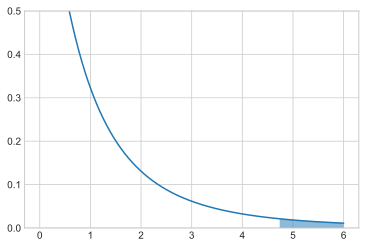

In [339]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.ylim(0, 0.5)

Считаем значение статистики:

In [340]:
F = (R2 / k1) / ((1 - R2) / k2)
F

11.294439122922636

__Статистика попала в критическую область - значит гипотеза о равенстве нулю коэффициента детерминации отвергается. Уравнение признаётся значимым.
ОТВЕТ: 1__

<hr>

__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.
<hr>

### Двухвыборочный t-тест

Ранее с помощью распределения Стьюдента мы научились проверять гипотезы о математическом ожидании и о коэффициенте корреляции.

Распределение Стьюдента также можно применять для следующей __задачи__. Имеются две независимые выборки $X_1$, $X_2$, взятые, соответственно, из распределений $D_1$, $D_2$. Требуется проверить гипотезу о том, что математические ожидания двух соответствующих распределений равны, т.е.
$$H_0: \: M(D_1) = M(D_2)$$

In [345]:
n1 = 2509
success1 = 77
n2 = 1465
success2 = 60
mean1 = success1 / n1
mean2 = success2 / n2
std1 = ((((1 - mean1)**2)*success1) + ((-mean1**2)*(n1-success1)))/(n1-1)
std2 = ((((1 - mean2)**2)*success2) + ((-mean2**2)*(n2-success2)))/(n2-1)
std1, std2

(0.02793292095844359, 0.03608556693806071)

In [347]:
s_delta = np.sqrt(std1 ** 2 / n1 + std2 ** 2 / n2)
t = (mean1 - mean2) / s_delta
t

-9.372294067911469

In [ ]:
df = (std1 ** 2 / n1 + std2 ** 2 / n2) ** 2 / \
    ((std2 ** 2 / n1) ** 2 / (n1 - 1) + (std2 ** 2 / n2) ** 2 / (n2 - 1))